### Jupyter notebook about oil stocks performance in Brazilian market!

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [37]:
ativos = ['PETR4','PRIO3', 'RRRP3', 'RECV3', 'ENAT3', 'BRKM5']

In [38]:
ativos = [i + '.SA' for i in ativos]

In [39]:
inicio = '2022-02-01'
fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest = yesterday.strftime('%Y-%m-%d')
#yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest

NameError: name 'yes' is not defined

In [ ]:
df = yf.download(ativos, start = inicio, end = yest)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
df.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-08-18,23.010000,13.83,30.362619,45.169998,22.820000,31.750000
2023-08-21,22.340000,13.84,30.150696,44.750000,22.760000,31.590000
2023-08-22,22.639999,14.08,30.610001,45.099998,23.000000,31.770000
2023-08-23,22.879999,14.83,32.240002,45.849998,23.709999,31.610001
2023-08-24,22.650000,15.35,32.189999,46.060001,23.379999,31.469999


#### normalizando os ativos


In [ ]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

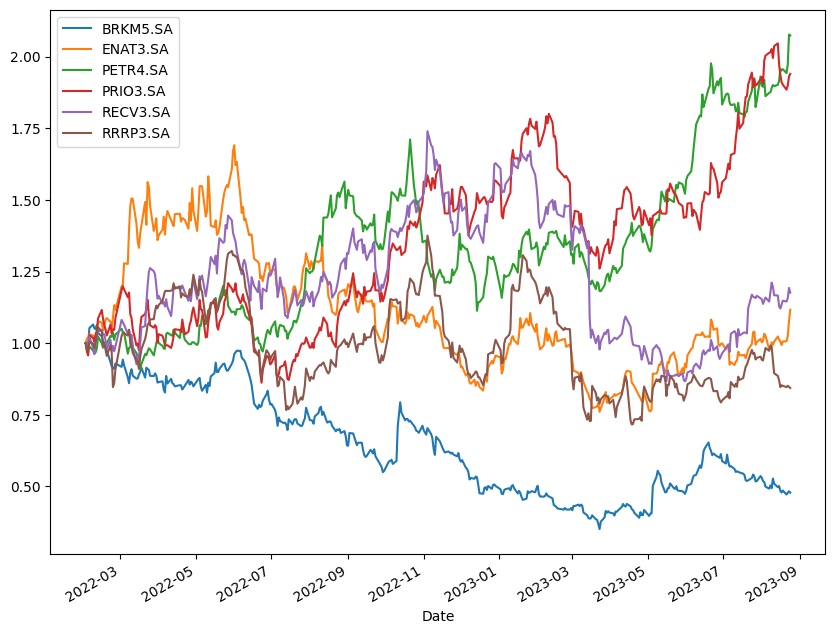

In [ ]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [ ]:
primeiro = df.iloc[0]

In [ ]:
primeiro

BRKM5.SA    47.347416
ENAT3.SA    13.744496
PETR4.SA    15.517877
PRIO3.SA    23.740000
RECV3.SA    19.869772
RRRP3.SA    37.299999
Name: 2022-02-01 00:00:00, dtype: float64

In [ ]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [ ]:
comprados = 10000/primeiro

In [ ]:
comprados

BRKM5.SA    211.204768
ENAT3.SA    727.563946
PETR4.SA    644.418063
PRIO3.SA    421.229996
RECV3.SA    503.277039
RRRP3.SA    268.096520
Name: 2022-02-01 00:00:00, dtype: float64

In [ ]:
## Número de papéis arredondados
round(comprados, 0)

BRKM5.SA    211.0
ENAT3.SA    728.0
PETR4.SA    644.0
PRIO3.SA    421.0
RECV3.SA    503.0
RRRP3.SA    268.0
Name: 2022-02-01 00:00:00, dtype: float64

In [ ]:
comprados = round(comprados, 0)

In [ ]:
comprados

BRKM5.SA    211.0
ENAT3.SA    728.0
PETR4.SA    644.0
PRIO3.SA    421.0
RECV3.SA    503.0
RRRP3.SA    268.0
Name: 2022-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [ ]:
PL = df*comprados
#PL=df*qntd

In [ ]:
PL.head()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2022-02-01,9990.304760,10005.993340,9993.512547,9994.539904,9994.495295,9996.399796
2022-02-02,9928.060146,10170.026894,9848.154133,9695.630289,10013.632374,9768.600204
2022-02-03,9994.194847,10202.832771,9711.877396,9573.539904,9783.985504,9782.000000
2022-02-04,10521.331032,10320.935875,9881.465282,10276.609936,10219.360533,10044.639877
2022-02-07,10643.876423,10275.006813,9736.106255,10175.570032,9827.043213,9983.000000


In [ ]:
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-08-18,4855.110048,10068.239944,19553.526894,19016.569229,11478.459846,8509.000000
2023-08-21,4713.740032,10075.520111,19417.048096,18839.750000,11448.280115,8466.120041
2023-08-22,4777.039871,10250.239944,19712.840393,18987.099358,11569.000000,8514.360123
2023-08-23,4827.679823,10796.239944,20762.561081,19302.849358,11926.129539,8471.480164
2023-08-24,4779.149920,11174.800278,20730.359116,19391.260578,11760.139578,8433.959816


In [ ]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [ ]:
#PL.head()
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,
2023-08-18,4855.110048,10068.239944,19553.526894,19016.569229,11478.459846,8509.000000,73480.905962
2023-08-21,4713.740032,10075.520111,19417.048096,18839.750000,11448.280115,8466.120041,72960.458395
2023-08-22,4777.039871,10250.239944,19712.840393,18987.099358,11569.000000,8514.360123,73810.579689
2023-08-23,4827.679823,10796.239944,20762.561081,19302.849358,11926.129539,8471.480164,76086.939909
2023-08-24,4779.149920,11174.800278,20730.359116,19391.260578,11760.139578,8433.959816,76269.669285


In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,112143.0,113302.0,112135.0,113147.0,113147.0,11133300
2022-02-02,113228.0,113666.0,111645.0,112161.0,112161.0,11751200
2022-02-03,111897.0,112502.0,111225.0,111696.0,111696.0,11039700
2022-02-04,111696.0,112415.0,110321.0,112245.0,112245.0,0
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800


In [ ]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [ ]:
ibov = ibov[['Ibov']]

In [ ]:
ibov

,Ibov
Date,
2022-02-01,113147.0
2022-02-02,112161.0
2022-02-03,111696.0
2022-02-04,112245.0
2022-02-07,111996.0
...,...
2023-08-10,118350.0
2023-08-11,118065.0
2023-08-14,116810.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [ ]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2022-02-01,113147.0,9990.304760,10005.993340,9993.512547,9994.539904,9994.495295,9996.399796,59975.245640
2022-02-02,112161.0,9928.060146,10170.026894,9848.154133,9695.630289,10013.632374,9768.600204,59424.104040
2022-02-03,111696.0,9994.194847,10202.832771,9711.877396,9573.539904,9783.985504,9782.000000,59048.430422
2022-02-04,112245.0,10521.331032,10320.935875,9881.465282,10276.609936,10219.360533,10044.639877,61264.342535
2022-02-07,111996.0,10643.876423,10275.006813,9736.106255,10175.570032,9827.043213,9983.000000,60640.602736


<Axes: xlabel='Date'>

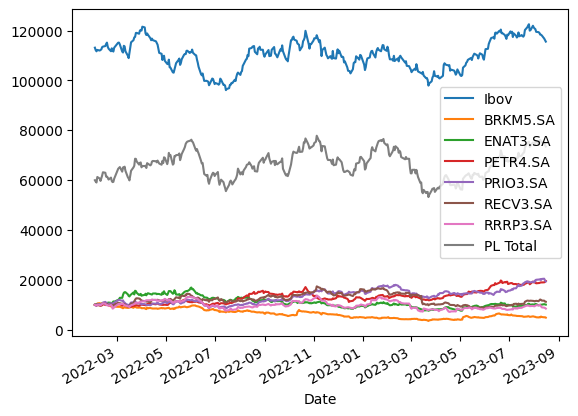

In [ ]:
novo_df.plot()

In [ ]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [ ]:
novo_normalizado

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2022-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-02-02,99.128567,99.376950,101.639353,98.545472,97.009271,100.191476,97.721184,99.081052
2022-02-03,98.717597,100.038939,101.967215,97.181820,95.787700,97.893743,97.855230,98.454670
2022-02-04,99.202807,105.315416,103.147539,98.878800,102.822241,102.249891,100.482575,102.149382
2022-02-07,98.982739,106.542059,102.688523,97.424266,101.811290,98.324557,99.865954,101.109386
...,...,...,...,...,...,...,...,...
2023-08-10,104.598443,52.780071,99.457992,190.137462,199.578776,119.679283,93.967828,125.931592
2023-08-11,104.346558,50.963709,100.549335,189.702940,203.706828,116.760277,89.544242,125.202885
2023-08-14,103.237381,49.759842,102.368245,190.199545,204.675656,116.659619,88.579093,125.372368


<Axes: xlabel='Date'>

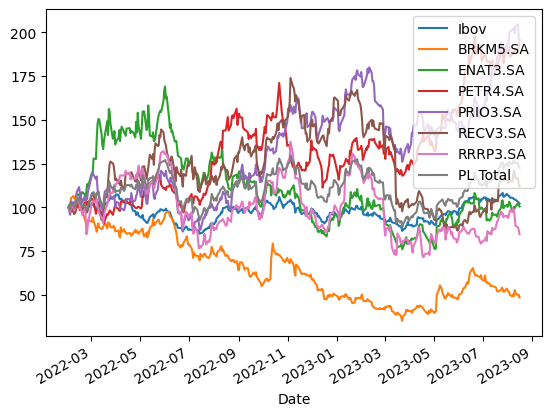

In [ ]:
novo_normalizado.plot()

<Axes: >

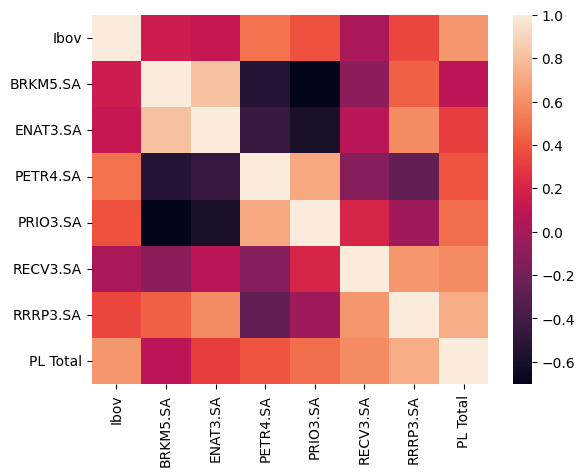

In [ ]:
sns.heatmap(novo_normalizado.corr())

<Axes: xlabel='Date'>

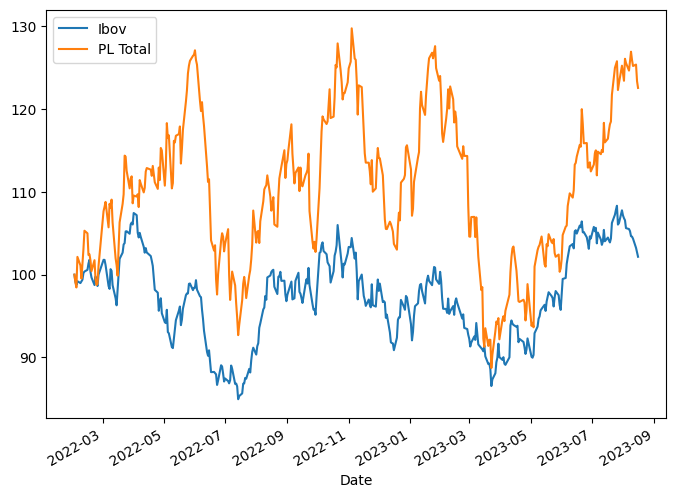

In [ ]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (8,6))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [ ]:
ativos

['PETR4.SA', 'PRIO3.SA', 'RRRP3.SA', 'RECV3.SA', 'ENAT3.SA', 'BRKM5.SA']